In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Import activity data from Excel file
df = pd.read_csv(r'C:\Users\ashka\Downloads\unified_results.csv')
df.head()

,uid,country,gender,device,group,join_dt,convert,spent
0,1000000,CAN,M,I,B,2023-01-28,False,0.0
1,1000001,BRA,M,A,A,2023-01-27,False,0.0
2,1000002,FRA,M,A,A,2023-02-01,False,0.0
3,1000003,BRA,M,I,B,2023-01-25,False,0.0
4,1000004,DEU,F,A,A,2023-02-04,False,0.0


In [2]:
df.shape

(48943, 8)

In [3]:
df.isnull().sum()

uid           0
country     643
gender     6855
device      294
group         0
join_dt       0
convert       0
spent         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48943 entries, 0 to 48942
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   uid      48943 non-null  int64  
 1   country  48300 non-null  object 
 2   gender   42088 non-null  object 
 3   device   48649 non-null  object 
 4   group    48943 non-null  object 
 5   join_dt  48943 non-null  object 
 6   convert  48943 non-null  bool   
 7   spent    48943 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 2.7+ MB


In [5]:
df[df['spent'] < 0]
# Convert 'join_dt' column to datetime format
df['join_dt'] = pd.to_datetime(df['join_dt'])

# Calculate minimum and maximum dates
join_dt_min = df['join_dt'].min()
join_dt_max = df['join_dt'].max()

# Check if the difference between the minimum and maximum dates is less than or equal to 14 days
(join_dt_max - join_dt_min).days <= 14
print(join_dt_min, join_dt_max)

2023-01-25 00:00:00 2023-02-06 00:00:00


In [6]:
avg_spent = df.groupby('group')['spent'].mean()
print(avg_spent)


group
A    3.374518
B    3.390867
Name: spent, dtype: float64


In [7]:
from scipy.stats import t

# calculate sample statistics for group A
spent_A = df[df['group'] == 'A']['spent']
mean_A = spent_A.mean()
std_A = spent_A.std(ddof=1)
n_A = len(spent_A)

# calculate 95% confidence interval for group A
ci_A = t.interval(0.95, n_A-1, loc=mean_A, scale=std_A/np.sqrt(n_A))

# calculate sample statistics for group B
spent_B = df[df['group'] == 'B']['spent']
mean_B = spent_B.mean()
std_B = spent_B.std(ddof=1)
n_B = len(spent_B)

# calculate 95% confidence interval for group B
ci_B = t.interval(0.95, n_B-1, loc=mean_B, scale=std_B/np.sqrt(n_B))

print("95% confidence interval for the average amount spent per user in the control: ", ci_A)
print("95% confidence interval for the average amount spent per user in the treatment: ", ci_B)


95% confidence interval for the average amount spent per user in the control:  (3.0486876385878503, 3.700349297269831)
95% confidence interval for the average amount spent per user in the treatment:  (3.073269643155625, 3.7084642486159454)


In [8]:
from scipy.stats import ttest_ind

# extract spent values for group A and group B
spent_A = df[df['group'] == 'A']['spent'].values
spent_B = df[df['group'] == 'B']['spent'].values

# perform t-test
t_stat, p_value = ttest_ind(spent_A, spent_B, equal_var=False)

print("t-statistic: ", t_stat)
print("p-value: ", p_value)


t-statistic:  -0.07042490999751483
p-value:  0.9438557531728754


In [9]:
if p_value < 0.05:
    print("We reject the null hypothesis and conclude that there is a statistically significant difference in spending between the two groups.")
else:
    print("We fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest a difference in spending between the two groups.")

We fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest a difference in spending between the two groups.


In [10]:
from scipy.stats import t

# extract spent values for group A and group B
spent_A = df[df['group'] == 'A']['spent'].values
spent_B = df[df['group'] == 'B']['spent'].values

# calculate difference in means
mean_diff = np.mean(spent_B) - np.mean(spent_A)

# calculate standard error of difference in means
std_error = np.sqrt(np.var(spent_A)/len(spent_A) + np.var(spent_B)/len(spent_B))

# calculate t-value for 95% confidence interval
t_value = t.ppf(0.975, len(spent_A) + len(spent_B) - 2)

# calculate 95% confidence interval for difference in means
ci_low = mean_diff - t_value * std_error
ci_high = mean_diff + t_value * std_error

print("95% confidence interval for difference in means: ({:.3f}, {:.3f})".format(ci_low, ci_high))


95% confidence interval for difference in means: (-0.439, 0.471)


In [11]:
# calculate conversion rate for group A (control)
conv_A = df[df['group'] == 'A']['convert'].mean()
print("Conversion rate for group A (control): {:.2%}".format(conv_A))

# calculate conversion rate for group B (treatment)
conv_B = df[df['group'] == 'B']['convert'].mean()
print("Conversion rate for group B (treatment): {:.2%}".format(conv_B))


Conversion rate for group A (control): 3.92%
Conversion rate for group B (treatment): 4.63%


In [12]:
from statsmodels.stats.proportion import proportion_confint

# extract conversion values for group A (control)
convert_A = df[df['group'] == 'A']['convert'].sum()
n_A = len(df[df['group'] == 'A'])

# calculate conversion rate and confidence interval
cr_A = convert_A / n_A
ci_A = proportion_confint(convert_A, n_A, alpha=0.05, method='wilson')

print("Conversion rate for control group: {:.2%}".format(cr_A))
print("the 95% confidence interval for the conversion rate of users in the control: ({:.4f}, {:.4f})".format(ci_A[0], ci_A[1]))

Conversion rate for control group: 3.92%
the 95% confidence interval for the conversion rate of users in the control: (0.0369, 0.0417)


In [13]:
from statsmodels.stats.proportion import proportion_confint

# extract conversion values for group A (control)
convert_B = df[df['group'] == 'B']['convert'].sum()
n_B = len(df[df['group'] == 'B'])

# calculate conversion rate and confidence interval
cr_B = convert_B / n_B
ci_B = proportion_confint(convert_B, n_B, alpha=0.05, method='wilson')

print("Conversion rate for treatment group: {:.2%}".format(cr_B))
print("the 95% confidence interval for the conversion rate of users in the treatment: ({:.4f}, {:.4f})".format(ci_B[0], ci_B[1]))

Conversion rate for treatment group: 4.63%
the 95% confidence interval for the conversion rate of users in the treatment: (0.0437, 0.0490)


In [14]:
from statsmodels.stats.proportion import proportions_ztest

# perform z-test for difference in proportions
count = np.array([convert_A, convert_B])
nobs = np.array([n_A, n_B])
stat, pval = proportions_ztest(count, nobs)

print("z-statistic: ", stat)
print("p-value: ", pval)

z-statistic:  -3.864291770414927
p-value:  0.00011141198532947085


In [15]:
# calculate conversion rates for control and treatment groups
conv_rate_control = sum(df[df['group'] == 'A']['convert']) / len(df[df['group'] == 'A'])
conv_rate_treatment = sum(df[df['group'] == 'B']['convert']) / len(df[df['group'] == 'B'])

# calculate standard error of the difference in conversion rates
se_diff_conv = np.sqrt((conv_rate_control * (1 - conv_rate_control) / len(df[df['group'] == 'A'])) 
                       + (conv_rate_treatment * (1 - conv_rate_treatment) / len(df[df['group'] == 'B'])))
                       
# calculate margin of error for 95% confidence interval
moe_conv = 1.96 * se_diff_conv

# calculate lower and upper bounds of confidence interval
ci_low_conv = round((conv_rate_treatment - conv_rate_control) - moe_conv, 4)
ci_high_conv = round((conv_rate_treatment - conv_rate_control) + moe_conv, 4)

print("95% confidence interval for the difference in conversion rate: ", (ci_low_conv, ci_high_conv))



95% confidence interval for the difference in conversion rate:  (0.0035, 0.0107)


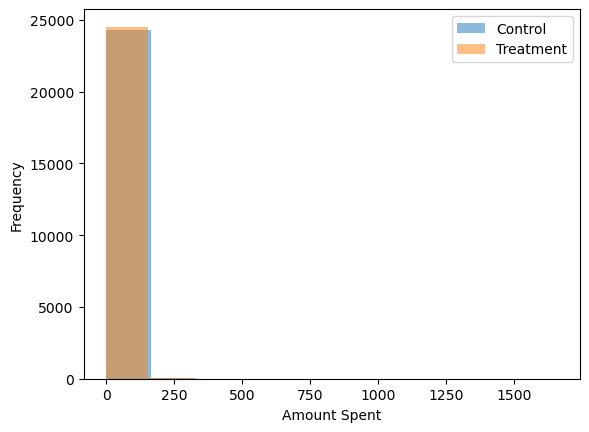

group
A    82145.903065
B    83415.326869
Name: spent, dtype: float64


In [16]:
# plot histograms for amount spent in group A and B
plt.hist(df[df['group'] == 'A']['spent'], alpha=0.5, label='Control')
plt.hist(df[df['group'] == 'B']['spent'], alpha=0.5, label='Treatment')
plt.legend(loc='upper right')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()
print(df.groupby('group')['spent'].sum())

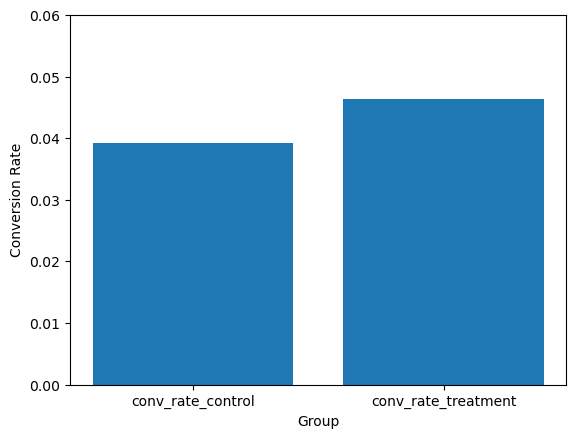

In [17]:
# plot bar chart for conversion rate in group A and B
plt.bar(['conv_rate_control', 'conv_rate_treatment'], [conv_rate_control, conv_rate_treatment])
plt.ylim(0, 0.06)
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()


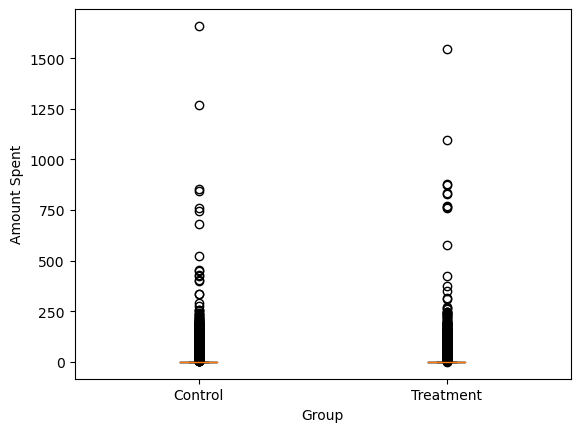

In [18]:
# plot box plot for amount spent in group A and B
plt.boxplot([df[df['group'] == 'A']['spent'], df[df['group'] == 'B']['spent']])
plt.xticks([1, 2], ['Control', 'Treatment'])
plt.xlabel('Group')
plt.ylabel('Amount Spent')
plt.show()


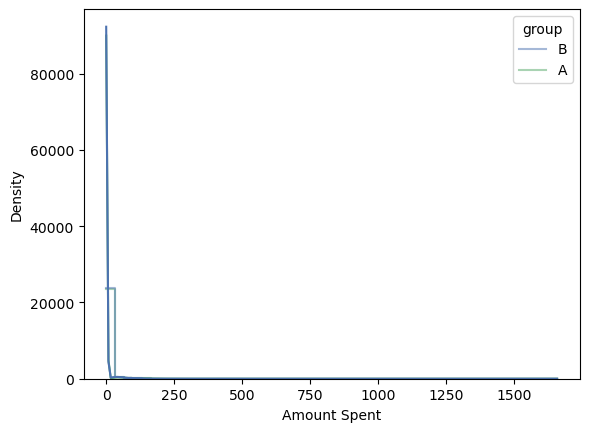

In [19]:
import seaborn as sns

# plot histograms with density lines for amount spent in group A and B
sns.histplot(data=df, x="spent", hue="group", kde=True, element="step", fill=False, alpha=0.5, palette=["#4c72b0", "#55a868"], bins=50)
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.show()


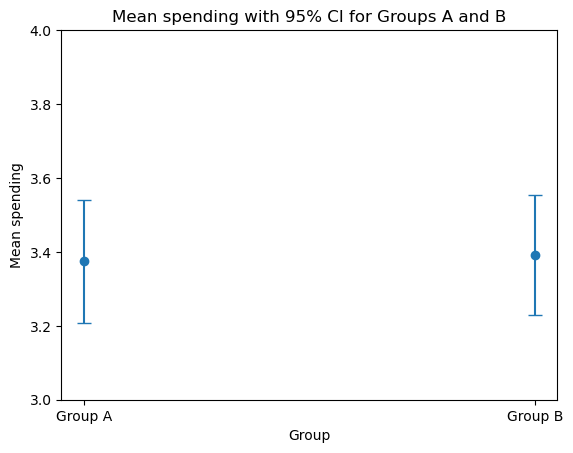

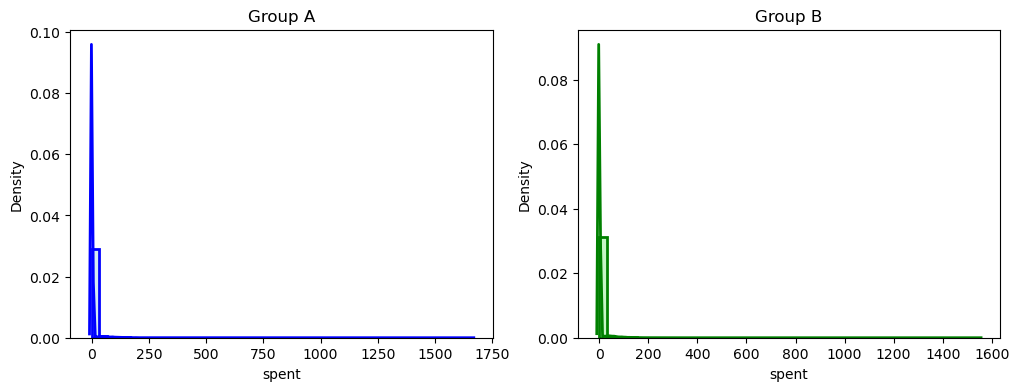

3.3745184679288407 3.390866945885785 0.1662350076525488 0.16203444463705732


In [20]:
from scipy.stats import sem

mean_a = df[df['group'] == 'A']['spent'].mean()
mean_b = df[df['group'] == 'B']['spent'].mean()
sem_a = sem(df[df['group'] == 'A']['spent'])
sem_b = sem(df[df['group'] == 'B']['spent'])

# Plot the confidence intervals for each group
plt.errorbar(['Group A', 'Group B'], [mean_a, mean_b], yerr=[sem_a, sem_b], fmt='o', capsize=5)
plt.xlabel('Group')
plt.ylabel('Mean spending')
plt.title('Mean spending with 95% CI for Groups A and B')
plt.ylim([3, 4])
plt.show()

# Plot histograms and density plots of spending for each group
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.histplot(data=df[df['group'] == 'A'], x='spent', stat='density', color='lightblue', alpha=0.5, bins=50, edgecolor='blue', linewidth=2, ax=axs[0])
sns.kdeplot(data=df[df['group'] == 'A'], x='spent', color='blue', linewidth=2, ax=axs[0])
axs[0].set_title('Group A')

sns.histplot(data=df[df['group'] == 'B'], x='spent', stat='density', color='lightgreen', alpha=0.5, bins=50, edgecolor='green', linewidth=2, ax=axs[1])
sns.kdeplot(data=df[df['group'] == 'B'], x='spent', color='green', linewidth=2, ax=axs[1])
axs[1].set_title('Group B')

plt.show()
plt.show()
print(mean_a, mean_b, sem_a, sem_b)

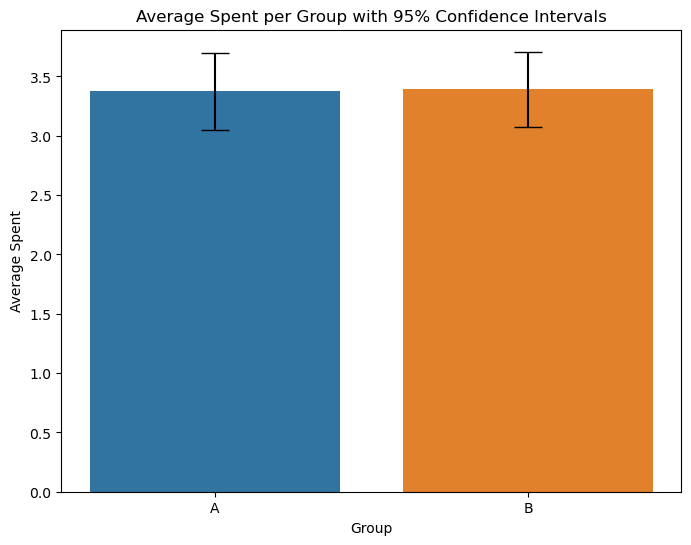

In [21]:
import scipy.stats as stats

# Calculate the average spent for each group
avg_spent_group = df.groupby('group')['spent'].mean()

# Calculate the standard error for each group
std_error_group_spent = df.groupby('group')['spent'].sem()

# Calculate the 95% confidence interval for each group
ci_low, ci_high = stats.t.interval(0.95, len(df.groupby('group')) - 1, loc=avg_spent_group, scale=std_error_group_spent)

# Create a DataFrame with the confidence intervals
ci_df = pd.DataFrame({'Group': avg_spent_group.index, 'CI Low': ci_low, 'CI High': ci_high})

# Create a bar chart to compare the average spent per group with error bars
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_spent_group.index, y=avg_spent_group.values, ci=None)
plt.errorbar(x=avg_spent_group.index, y=avg_spent_group.values, yerr=std_error_group_spent.values*1.96, fmt='none', capsize=10, ecolor='black')
plt.title('Average Spent per Group with 95% Confidence Intervals')
plt.xlabel('Group')
plt.ylabel('Average Spent')
plt.show()


C:\Users\ashka\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ashka\anaconda3\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


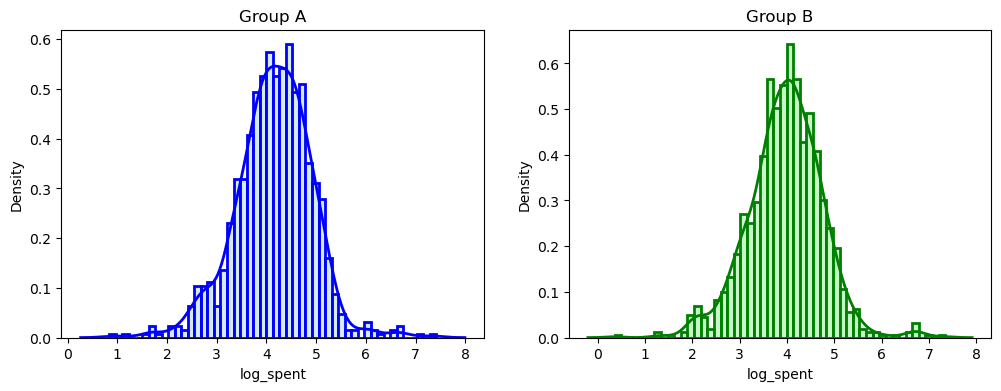

In [22]:
from scipy.stats import sem

# Transform spending data by taking natural logarithm
df['log_spent'] = np.log(df['spent'])

mean_a = df[df['group'] == 'A']['log_spent'].mean()
mean_b = df[df['group'] == 'B']['log_spent'].mean()
sem_a = sem(df[df['group'] == 'A']['log_spent'])
sem_b = sem(df[df['group'] == 'B']['log_spent'])

# Plot histograms and density plots of spending for each group
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.histplot(data=df[df['group'] == 'A'], x='log_spent', stat='density', color='lightblue', alpha=0.5, bins=50, edgecolor='blue', linewidth=2, ax=axs[0])
sns.kdeplot(data=df[df['group'] == 'A'], x='log_spent', color='blue', linewidth=2, ax=axs[0])
axs[0].set_title('Group A')

sns.histplot(data=df[df['group'] == 'B'], x='log_spent', stat='density', color='lightgreen', alpha=0.5, bins=50, edgecolor='green', linewidth=2, ax=axs[1])
sns.kdeplot(data=df[df['group'] == 'B'], x='log_spent', color='green', linewidth=2, ax=axs[1])
axs[1].set_title('Group B')

plt.show()


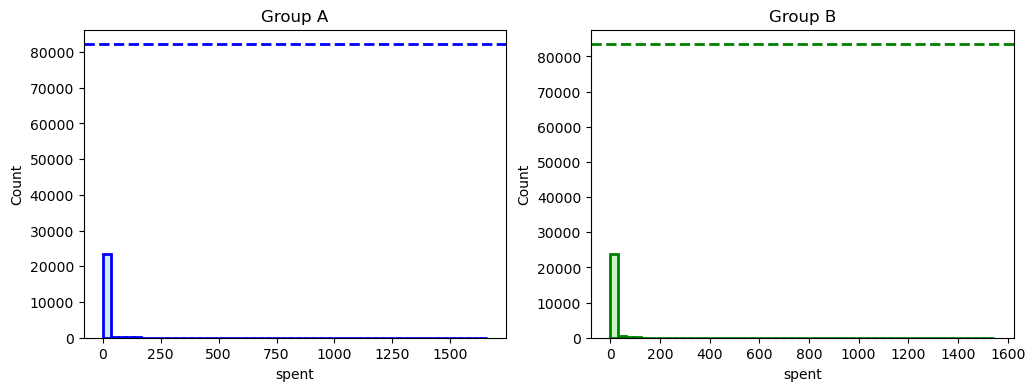

In [23]:
# Calculate the sum of spending for each group
sum_a = df[df['group'] == 'A']['spent'].sum()
sum_b = df[df['group'] == 'B']['spent'].sum()

# Plot histograms of spending for each group with count and sum on y-axis
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.histplot(data=df[df['group'] == 'A'], x='spent', stat='count', color='lightblue', alpha=0.5, bins=50, edgecolor='blue', linewidth=2, ax=axs[0])
axs[0].axhline(y=sum_a, color='blue', linestyle='--', linewidth=2)
axs[0].set_title('Group A')

sns.histplot(data=df[df['group'] == 'B'], x='spent', stat='count', color='lightgreen', alpha=0.5, bins=50, edgecolor='green', linewidth=2, ax=axs[1])
axs[1].axhline(y=sum_b, color='green', linestyle='--', linewidth=2)
axs[1].set_title('Group B')

plt.show()


In [24]:
purchases_per_user = df.loc[df['spent'] > 0].groupby('uid')['spent'].count()
print(purchases_per_user.value_counts())

1    2094
Name: spent, dtype: int64


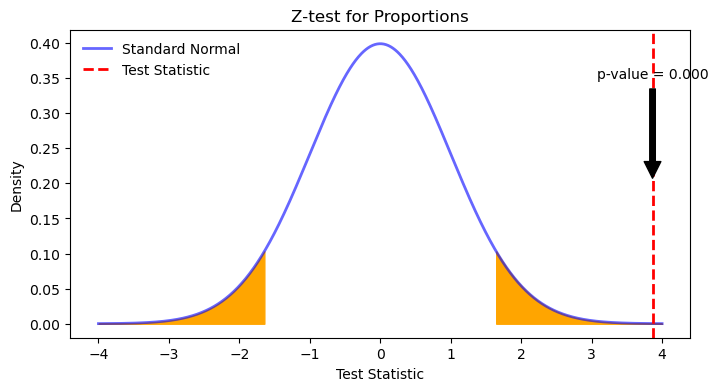

0.03923099042845993 0.04630081300813008


In [33]:
from scipy import stats

# calculate sample size for each group
sample_size_A = df[df['group'] == 'A']['uid'].nunique()
sample_size_B = df[df['group'] == 'B']['uid'].nunique()
# calculate the conversion rate for each group
conversion_A = df[df['group'] == 'A']['convert'].mean()
conversion_B = df[df['group'] == 'B']['convert'].mean()
num_purchases = df.loc[df['spent'] > 0].groupby('group')['uid'].count()
num_purchases_A = num_purchases['A']
num_purchases_B = num_purchases['B']

alpha = 0.05

# Calculate pooled standard error and degrees of freedom
pooled_prob = (num_purchases_A + num_purchases_B) / (sample_size_A + sample_size_B)
deg_greedom = sample_size_A - 1 + sample_size_B - 1

# calculate pooled probability
pooled_prob = (num_purchases_A + num_purchases_B) / (sample_size_A + sample_size_B)

# calculate pooled standard error
se_pooled = np.sqrt(pooled_prob * (1 - pooled_prob) * (1/sample_size_A + 1/sample_size_B))

# Calculate test statistic and p-value
test_stat = (conversion_B - conversion_A) / se_pooled
p_value = stats.norm.sf(abs(test_stat))*2

# Set up plot
fig, ax = plt.subplots(figsize=(8, 4))

# Shade alpha level on both tails of distribution
shade = np.linspace(-4, 4, 300)
ax.fill_between(shade, stats.norm.pdf(shade), where=(shade >= stats.norm.ppf(1-alpha)), color='orange')
ax.fill_between(shade, stats.norm.pdf(shade), where=(shade <= stats.norm.ppf(alpha)), color='orange')

# Plot standard normal distribution
x = np.linspace(-4, 4, 1000)
ax.plot(x, stats.norm.pdf(x), 'b-', lw=2, alpha=0.6, label='Standard Normal')

# Plot vertical line for test statistic
ax.axvline(x=test_stat, ymin=0, ymax=1, color='r', linestyle='--', lw=2, label='Test Statistic')

# Add legend and axis labels
ax.legend(loc='best', frameon=False)
ax.set_xlabel('Test Statistic')
ax.set_ylabel('Density')
ax.set_title('Z-test for Proportions')

# Add annotation for p-value
ax.annotate('p-value = {0:.3f}'.format(p_value), 
            xy=(test_stat, 0.2), 
            xytext=(test_stat, 0.35), 
            ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()
print(conversion_A,
conversion_B)

In [28]:
from tabulate import tabulate

# Create table
table = [["Sample Size A", sample_size_A], ["Sample Size B", sample_size_B],
         ["Conversion Rate A", num_purchases_A/sample_size_A], ["Conversion Rate B", num_purchases_B/sample_size_B],
         ["Pooled Probability", pooled_prob], ["Pooled Standard Error", se_pooled],
         ["Test Statistic", test_stat], ["P-value", p_value]]

# Print table
print(tabulate(table, headers=["Metric", "Value"]))


Metric                           Value
---------------------  ---------------
Sample Size A           24343
Sample Size B           24600
Conversion Rate A           0.039231
Conversion Rate B           0.0463008
Pooled Probability          0.0427845
Pooled Standard Error       0.00182953
Test Statistic         100572
P-value                     0


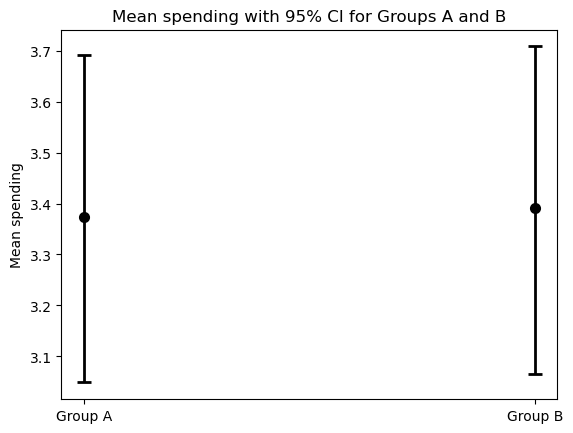

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# calculate sample statistics for group A
spent_A = df[df['group'] == 'A']['spent']
mean_A = spent_A.mean()
std_A = spent_A.std(ddof=1)
n_A = len(spent_A)

# calculate 95% confidence interval for group A
ci_A = t.interval(0.95, n_A-1, loc=mean_A, scale=std_A/np.sqrt(n_A))

# calculate sample statistics for group B
spent_B = df[df['group'] == 'B']['spent']
mean_B = spent_B.mean()
std_B = spent_B.std(ddof=1)
n_B = len(spent_B)

# calculate 95% confidence interval for group B
ci_B = t.interval(0.95, n_B-1, loc=mean_B, scale=std_B/np.sqrt(n_B))

# plot the two confidence intervals
plt.errorbar([0, 1], [mean_A, mean_B], yerr=[(ci_A[1]-mean_A, mean_A-ci_A[0]), (ci_B[1]-mean_B, mean_B-ci_B[0])],
             fmt='o', capsize=5, color='black', elinewidth=2, markeredgewidth=2)

# add labels and title
plt.xticks([0, 1], ['Group A', 'Group B'])
plt.ylabel('Mean spending')
plt.title('Mean spending with 95% CI for Groups A and B')

plt.show()


0.0034859853091298585 0.010653659850210453


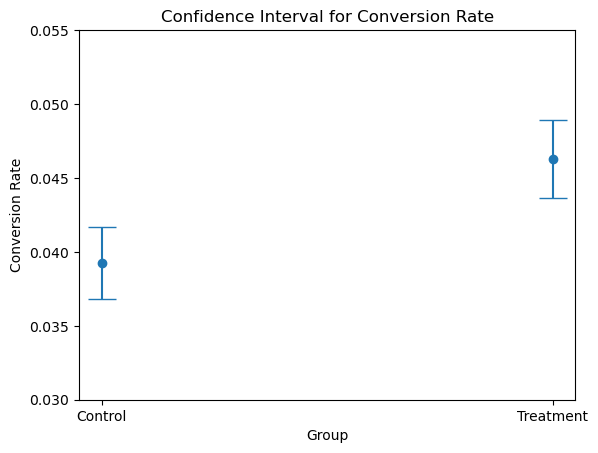

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
control_conv = df[df['group'] == 'A']['convert'].mean()
treatment_conv = df[df['group'] == 'B']['convert'].mean()
control_size = df[df['group'] == 'A']['uid'].nunique()
treatment_size = df[df['group'] == 'B']['uid'].nunique()

# Calculate confidence intervals
z = 1.96 # 95% confidence level
p1 = control_conv
p2 = treatment_conv
n1 = control_size
n2 = treatment_size
se = np.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))
diff = p2 - p1
me = z * se
ci_low = diff - me
ci_high = diff + me
print(ci_low, ci_high)

# Visualization of confidence intervals for conversion rates
plt.errorbar(x=['Control', 'Treatment'], y=[control_conv, treatment_conv], yerr=[z*np.sqrt(p1*(1-p1)/n1), z*np.sqrt(p2*(1-p2)/n2)], fmt='o', capsize=10)
plt.ylim([0.030, 0.055])
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.title('Confidence Interval for Conversion Rate')
plt.show()
